# Лінійна Класифікація

**Завдання класифікації**

- Завдання регресії: прогнозування реальної величини $y\in R$
- Завдання класифікації: прогнозування дискретної величини $y$
- Бінарна класифікація: $y\in \{-1,1\}$
- Багатокласова класифікація: $y\in \{1,2,,..., k\}$

## Приклад лінійної класифікації

**Приклад: класифікація раку молочної залози**

Відомий приклад класифікації: використання машинного навчання для діагностики того, чи є 
пухлина молочної залози доброякісною чи злоякісною [Street et al., 1992]

Умови: лікар бере зразок рідини з пухлини, фарбує клітини, а потім окреслює 
декілька клітин (обробка зображення уточнює контури)

Система обчислює характеристики кожної клітини, такі як площа, периметр, увігнутість, текстура 
(всього 10); обчислює середнє/стандартне/максимальне значення для всіх характеристик

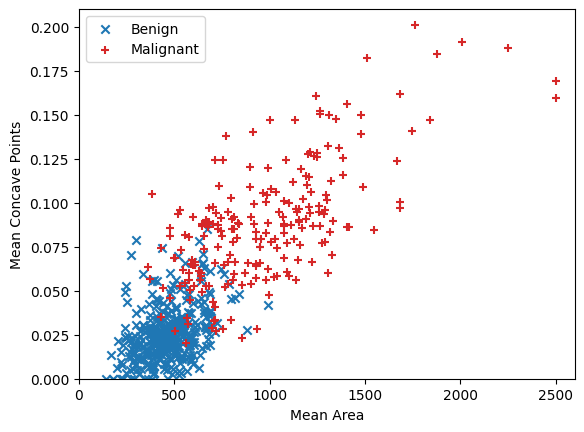

In [12]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
dat = sklearn.datasets.load_breast_cancer()

ix = np.where(dat["feature_names"] == "mean area")[0][0]
iy = np.where(dat["feature_names"] == "mean concave points")[0][0]

def plot_cells():    
    plt.scatter(dat["data"][:,ix][dat["target"]==1], dat["data"][:,iy][dat["target"]==1], marker='x', color='C0')
    plt.scatter(dat["data"][:,ix][dat["target"]==0], dat["data"][:,iy][dat["target"]==0], marker='+', color='C3')
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend(['Benign', 'Malignant'])

plot_cells()

Задача лінійної класифікації = "Провести лінію, що розділить класи"

**Функція втрат (Loss function)**

Як визначити функцію втрат $l:R\times \{-1, 1\}\rightarrow R$ ?
Квадратична втрата є поганою ідеєю:

![graph](../resources/m-class.png)

Ідеальна функція втрат виглядала б наступним чином:

$$l(h_{\theta}(x), y)= \begin{cases}
    0,& \text{if } sign(h_{\theta}(x))=y\\
    1,              & \text{otherwise}
\end{cases} $$

Приклади функцій втрат: logistic, hinge, exponential.

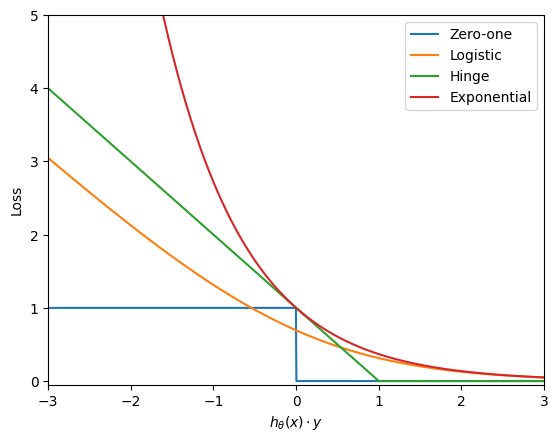

In [13]:
hy = np.linspace(-3,3,1000)
plt.plot(hy,(hy<=0))
plt.plot(hy, np.log(1+np.exp(-hy)))
plt.plot(hy, np.maximum(1 - hy, 0))
plt.plot(hy, np.exp(-hy))
plt.xlim([-3,3])
plt.ylim([-0.05, 5])
plt.ylabel("Loss")
plt.xlabel("$h_θ(x) \cdot y$")
plt.legend(['Zero-one', 'Logistic', 'Hinge', 'Exponential'])

## Логістична регресія (Logistic regression)

Логістична регресія характерна вибором наступної функції втрат:

$$l_{logistic}(h_{\theta}(x), y) = log(1 + exp(-h_{\theta}(x)\cdot y))$$

Логістична регресія також має гарну ймовірнісну інтерпретацію: певні величини дають ймовірність, за певною моделлю, того, що приклад буде позитивним або негативним.

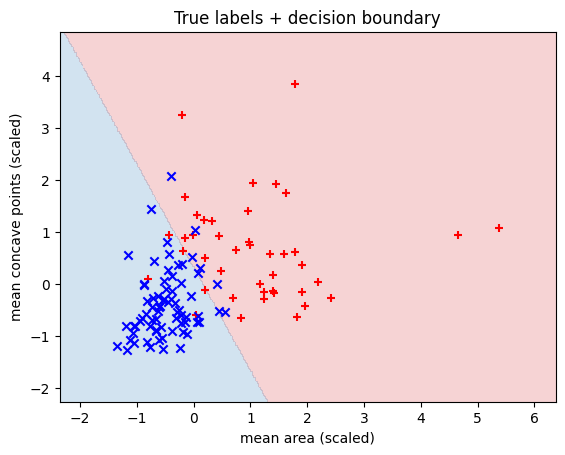

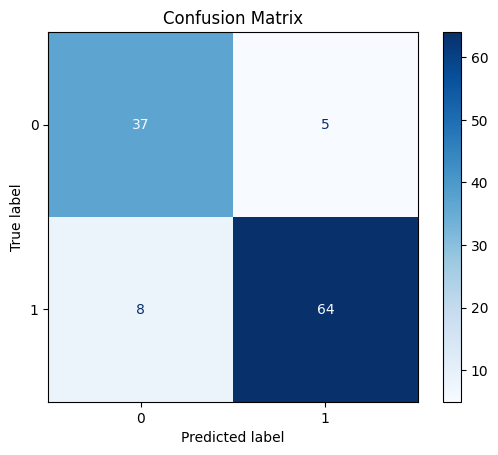

Precision: 0.927536231884058
Recall: 0.8888888888888888
F1: 0.9078014184397163

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.93      0.89      0.91        72

    accuracy                           0.89       114
   macro avg       0.87      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

# load data
data = load_breast_cancer()
X = data.data[:, [3, 25]]  # mean area, mean concave points
y = data.target # 0 means malignant tumor, 1 mean benign tumor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# decision boundary grid
xx, yy = np.meshgrid(
    np.linspace(X_test[:,0].min()-1, X_test[:,0].max()+1, 300),
    np.linspace(X_test[:,1].min()-1, X_test[:,1].max()+1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

# true labels + decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, levels=[-1,0,1], colors=['C3','C0'])
# plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
for cls, marker, color in [(0, '+', 'red'), (1, 'x', 'blue')]:
    idx = (y_test == cls)
    plt.scatter(
        X_test[idx, 0],
        X_test[idx, 1],
        marker=marker,
        color=color,
        label=f"Class {cls}"
    )
plt.title("True labels + decision boundary")
plt.xlabel("mean area (scaled)")
plt.ylabel("mean concave points (scaled)")
plt.show()

# confusion matrix + metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")  
plt.title("Confusion Matrix")
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print()
print(classification_report(y_test, y_pred))


*Матриця невідповідностей (Confusion matrix)*: Це матриця розміром 2×2 для бінарної класифікації з фактичними значеннями на одній осі та прогнозованими на іншій.

Істинно позитивні (True Positive, TP) – модель правильно прогнозує позитивний клас (прогноз і фактичне значення є позитивними).

Істинно негативні (True Negative, TN) – модель правильно прогнозує негативний клас (прогноз і фактичний результат є негативними).

Хибно позитивні (False Positive, FP) – модель дає неправильний прогноз негативного класу (прогноз – позитивний, фактичний результат – негативний). (Type 1 error)

Хибно негативні (False Negative, FN) – модель дає неправильний прогноз щодо позитивного класу (прогноз – негативний, фактичний результат – позитивний). (Type 2 error)

|                     | Передбачувані позитивні  | Передбачувані Негативні  |
| ------------------- | ------------------- | ------------------- |
| **Справді Позитивні** | True Positive (TP)  | False Negative (FN) |
| **Справді Негативні** | False Positive (FP) | True Negative (TN)  |


*Влучність (Precision)*: З усіх позитивних прогнозів, який відсоток є дійсно позитивним?

$$P = \frac{TP}{TP + FP}$$

*Повнота (Recall)*: З загальної кількості позитивних результатів, який відсоток є прогнозованими позитивними.

$$R = \frac{TP}{TP + FN}$$

*F1-міра (F1 Score)*: Це гармонійне середнє значення влучності та повноти. Воно враховує як помилкові позитивні, так і помилкові негативні результати. Тому воно добре працює з незбалансованими наборами даних.

$$F_{1} = \frac{2}{\frac{1}{P} + \frac{1}{R}}$$